In [14]:
import torch
torch.cuda.is_available()

True

In [29]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 *124 * 124, 128)
        self.fc2 = nn.Linear(128, 42)

    def forward(self, x):
        x = nn.functional.relu (self.conv1(x))
        x = nn.functional.relu (self.conv2(x))
        x = x.view(-1, 64 * 124 * 124)
        x = nn.functional.relu (self.fc1 (x))
        x = self.fc2 (x)
        return x

transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
train_set =  datasets.ImageFolder("simpsons_dataset", transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)

In [33]:

model = Net().cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i,data in enumerate(train_loader, 0):
        x, label = data
        x = x.cuda()
        label = label.cuda()
        optimizer.zero_grad()
        y = model(x)
        loss = criterion(y, label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

[1,   100] loss: 3.080
[1,   200] loss: 2.624
[1,   300] loss: 2.320
[1,   400] loss: 2.143
[1,   500] loss: 2.029
[1,   600] loss: 1.962
[2,   100] loss: 1.731
[2,   200] loss: 1.670
[2,   300] loss: 1.648
[2,   400] loss: 1.620
[2,   500] loss: 1.614
[2,   600] loss: 1.521
[3,   100] loss: 1.263
[3,   200] loss: 1.296
[3,   300] loss: 1.283
[3,   400] loss: 1.244
[3,   500] loss: 1.156
[3,   600] loss: 1.218
[4,   100] loss: 0.945
[4,   200] loss: 0.926
[4,   300] loss: 0.943
[4,   400] loss: 1.012
[4,   500] loss: 0.986
[4,   600] loss: 0.928
[5,   100] loss: 0.624
[5,   200] loss: 0.642
[5,   300] loss: 0.614
[5,   400] loss: 0.649
[5,   500] loss: 0.608
[5,   600] loss: 0.652
[6,   100] loss: 0.365
[6,   200] loss: 0.392
[6,   300] loss: 0.328
[6,   400] loss: 0.364
[6,   500] loss: 0.379
[6,   600] loss: 0.368
[7,   100] loss: 0.181
[7,   200] loss: 0.146
[7,   300] loss: 0.197
[7,   400] loss: 0.188
[7,   500] loss: 0.179
[7,   600] loss: 0.215
[8,   100] loss: 0.155
[8,   200] 

tensor(25, device='cuda:0') milhouse_van_houten


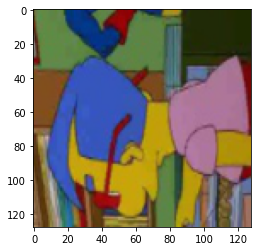

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

transform = transforms.Compose([transforms.Resize((128, 128)), transforms.ToTensor()])
test_set =  datasets.ImageFolder("kaggle_simpson_testset", transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = True)


for i,data in enumerate(test_loader, 0):
  content = os.listdir('simpsons_dataset')
  content.sort()
  x, label = data
  plt.imshow(np.swapaxes(x[0], 2,0))
  x = x.cuda()
  label = label
  optimizer.zero_grad()
  y = model(x)
  print(y[0].argmax(),content[y[0].argmax()])
  plt.show()
  break
    



In [105]:
torch.save(model.state_dict(),"myWeight")